In [1]:
from game import Game
from player import Player
from player_ai import SharedAI

from constants import *
#BUILDING ORDER
BUILDING_ORDER_ = BUILDING_ORDER + ['DO NOT BUY']


game = Game(0,name='t004',options={'use_max_probability':True,'game_record_filename':''})
players = game.players
players[0].load_ai(True)
shared_ai = SharedAI(players)



Using TensorFlow backend.


loaded ai


In [2]:
def set_player_attrs(attr, val):
    global players
    for i in range(4):
        setattr(players[i], attr, val)

In [3]:
#let's see what the best option is to buy first turn
p0 = players[0]
p1 = players[1]
p2 = players[2]
p3 = players[3]

ai = p0.AI
#buy_ai = ai.buy_ai





In [6]:
#let's make a new game and then see the results:

game = Game(1,name='t004',options={'use_max_probability':True,'full_record':'test_full_record.csv'})
players = game.players
players[0].load_ai(True)
shared_ai = SharedAI(players)

game.run()

loaded ai
Beginning game #1
Player 0, order 0 won in 53 turns


In [10]:
for player in players:
    print '------'
    print 'Player #%d' % player.order
    print 'Won? ' + str(['No','Yes'][player.win])
    print '#coins: %d' % player.coins
    print 'buildings:'
    print player.buildings
    

------
Player #0
Won? No
#coins: 6
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 1, 'radio_tower': 0, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 1, 'bakery': 2, 'station': 1, 'forest': 2, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 1, 'cheese_factory': 1, 'ranch': 2}
------
Player #1
Won? No
#coins: 4
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 3, 'fruit&veg_market': 0, 'radio_tower': 0, 'family_restaurant': 1, 'amusement_park': 1, 'mine': 0, 'convenience_store': 1, 'bakery': 3, 'station': 1, 'forest': 0, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 2, 'cheese_factory': 0, 'ranch': 1}
------
Player #2
Won? No
#coins: 5
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 0, 'radio_tower': 0, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store':

In [7]:
#just for fun let's run that a few more times
nturns = []
game_data = []
for i in range(10000):
    game = Game(1 + i,players, options={'use_max_probability':True,'full_record':'machikoro_game_records.csv',
                                       'prob_mod':0.0001})
    players = game.players
    game.run(silent=True)
    nturns.append(game.turn)
    if i % 100 == 0:
        print i
    for player in players:
        continue
        result_data = {'game':i, 'order':player.order,'coins':player.coins,'won':player.win}
        result_data.update(player.buildings)
        game_data.append(result_data)
    if i > 10:
        continue
    for player in players:
        print '------'
        print 'Player #%d' % player.order
        print 'Won? ' + str(['No','Yes'][player.win])
        print '#coins: %d' % player.coins
        print 'buildings:'
        print player.buildings

0
------
Player #0
Won? Yes
#coins: 0
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 3, 'fruit&veg_market': 0, 'radio_tower': 1, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 1, 'bakery': 3, 'station': 1, 'forest': 0, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 0, 'cheese_factory': 0, 'ranch': 2}
------
Player #1
Won? No
#coins: 11
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 3, 'fruit&veg_market': 0, 'radio_tower': 0, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 2, 'bakery': 2, 'station': 0, 'forest': 0, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 2, 'cheese_factory': 0, 'ranch': 1}
------
Player #2
Won? No
#coins: 7
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 0, 'radio_tower': 1, 'family_restaurant': 0, 'amusement_park': 0, 'mine': 0, 'convenience_sto

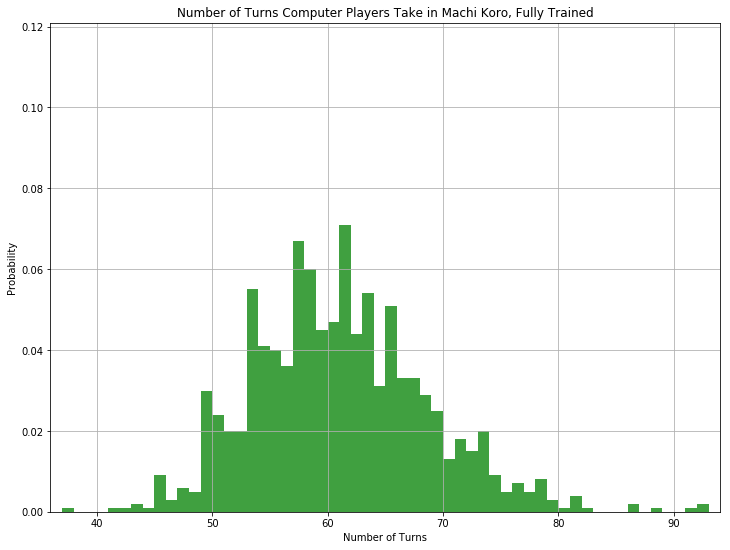

In [14]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
turns = np.asarray(nturns)
#mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(turns, np.max(turns)-np.min(turns), normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins)

plt.xlabel('Number of Turns')
plt.ylabel('Probability')
plt.title(r'Number of Turns Computer Players Take in Machi Koro, Fully Trained')
plt.axis([np.min(turns)-1, np.max(turns)+1, 0, np.max(n)+0.05])
plt.grid(True)

plt.show()

In [15]:
#drunken AI

game2 = Game(0,options={'use_max_probability':False, 'game_record_filename':''})
players2 = game2.players
shared_ai2 = SharedAI(players2)

game2.run()

#just for fun let's run that a few more times
nturns_drunk = []

for i in range(1000):
    game2 = Game(1 + i,players2, options={'use_max_probability':False,'game_record_filename':''})
    game2.run(silent=True)
    nturns_drunk.append(game2.turn)
    if i % 100 == 0:
        print i

Beginning game #0
Player 1, order 1 won in 110 turns
0
100
200
300
400
500
600
700
800
900


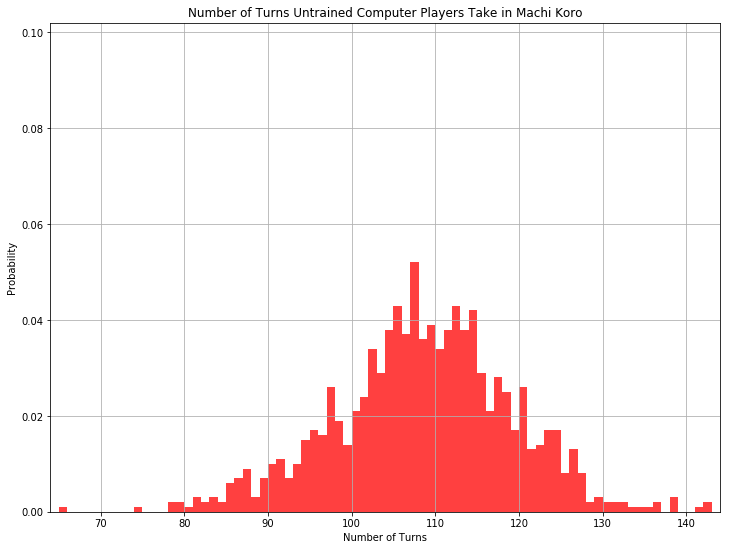

In [16]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
turns2 = np.asarray(nturns_drunk)
#mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(turns2, np.max(turns2)-np.min(turns2), normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins)

plt.xlabel('Number of Turns')
plt.ylabel('Probability')
plt.title(r'Number of Turns Untrained Computer Players Take in Machi Koro')
plt.axis([np.min(turns2)-1, np.max(turns2)+1, 0, np.max(n)+0.05])
plt.grid(True)

plt.show()

In [21]:
#export some data for the 1,000 game trials
import csv

with open('gamedata.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f,game_data[0].keys())
    w.writeheader()
    for entry in game_data:
        w.writerow(entry)
        


In [23]:
#let's see how well an AI that is trained outperforms 3 others that aren't


game = Game(0,name='t004',options={'use_max_probability':True,'game_record_filename':''})
players = game.players
players[0].load_ai(True)
#shared_ai = SharedAI(players)

game.run()

nturns_cheat = []
game_data_cheat = []
for i in range(1000):
    game = Game(1 + i,players, options={'use_max_probability':True,'game_record_filename':''})
    players = game.players
    game.run(silent=True)
    nturns_cheat.append(game.turn)
    if i % 100 == 0:
        print i
    for player in players:
        result_data = {'game':i, 'order':player.order,'coins':player.coins,'won':player.win,'id':player.id}
        result_data.update(player.buildings)
        game_data_cheat.append(result_data)
    if i > 10:
        continue
    for player in players:
        print '------'
        print 'Player #%d' % player.order
        print 'Won? ' + str(['No','Yes'][player.win])
        print '#coins: %d' % player.coins
        print 'buildings:'
        print player.buildings

loaded ai
Beginning game #0
Player 0, order 0 won in 89 turns
0
------
Player #0
Won? No
#coins: 3
buildings:
{'furniture_factory': 1, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 2, 'radio_tower': 0, 'family_restaurant': 1, 'amusement_park': 0, 'mine': 0, 'convenience_store': 2, 'bakery': 2, 'station': 1, 'forest': 0, 'stadium': 1, 'business_center': 1, 'shopping_mall': 0, 'tv_station': 1, 'cafe': 5, 'cheese_factory': 3, 'ranch': 0}
------
Player #1
Won? No
#coins: 16
buildings:
{'furniture_factory': 3, 'apple_orchard': 3, 'wheat_field': 3, 'fruit&veg_market': 1, 'radio_tower': 0, 'family_restaurant': 2, 'amusement_park': 0, 'mine': 2, 'convenience_store': 1, 'bakery': 4, 'station': 0, 'forest': 0, 'stadium': 0, 'business_center': 0, 'shopping_mall': 0, 'tv_station': 0, 'cafe': 0, 'cheese_factory': 0, 'ranch': 1}
------
Player #2
Won? No
#coins: 21
buildings:
{'furniture_factory': 1, 'apple_orchard': 1, 'wheat_field': 2, 'fruit&veg_market': 1, 'radio_tower': 0, 'family_re

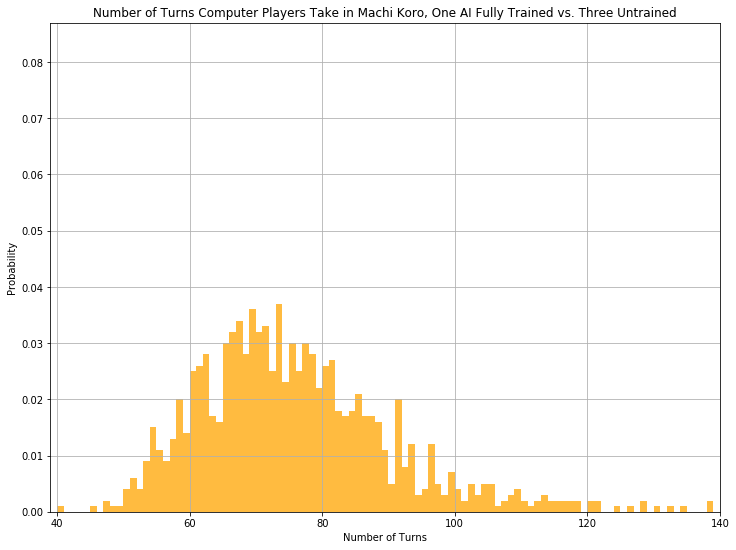

In [27]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
turns = np.asarray(nturns_cheat)
#mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(turns, np.max(turns)-np.min(turns), normed=1, facecolor='orange', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins)

plt.xlabel('Number of Turns')
plt.ylabel('Probability')
plt.title(r'Number of Turns Computer Players Take in Machi Koro, One AI Fully Trained vs. Three Untrained')
plt.axis([np.min(turns)-1, np.max(turns)+1, 0, np.max(n)+0.05])
plt.grid(True)

plt.show()

In [26]:
#export some data for the 1,000 game trials
import csv

with open('gamedata_cheat.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f,game_data_cheat[0].keys())
    w.writeheader()
    for entry in game_data_cheat:
        w.writerow(entry)
        